In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

### WGET Calls
# wget http://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot3/CMIP/NOAA-GFDL/GFDL-AM4/amip/r1i1p1f1/Amon/tas/gr1/v20180807/tas_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc
# wget http://esgdata.gfdl.noaa.gov/thredds/fileServer/gfdl_dataroot3/CMIP/NOAA-GFDL/GFDL-AM4/amip/r1i1p1f1/Amon/tas/gr1/v20180807/pr_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc

In [8]:
### Precip file
file_ = "~/Projects/CMIP-Python-EDA/data/pr_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc"

### Air Temp file
# file_ = "~/Projects/CMIP-Python-EDA/data/tas_Amon_GFDL-AM4_amip_r1i1p1f1_gr1_198001-201412.nc"

ds = xr.open_dataset(file_)
df = ds.to_dataframe().reset_index()    

In [9]:
df

,bnds,lat,lon,time,lat_bnds,lon_bnds,pr,time_bnds
0,1.0,-89.5,0.625,1980-01-16 12:00:00,-90.0,0.0,1.154858e-06,1980-01-01 00:00:00
1,1.0,-89.5,0.625,1980-02-15 12:00:00,-90.0,0.0,8.677920e-07,1980-02-01 00:00:00
2,1.0,-89.5,0.625,1980-03-16 12:00:00,-90.0,0.0,9.674663e-07,1980-03-01 00:00:00
3,1.0,-89.5,0.625,1980-04-16 00:00:00,-90.0,0.0,1.774007e-06,1980-04-01 00:00:00
4,1.0,-89.5,0.625,1980-05-16 12:00:00,-90.0,0.0,1.400000e-06,1980-05-01 00:00:00
...,...,...,...,...,...,...,...,...
43545595,2.0,89.5,359.375,2014-08-16 12:00:00,90.0,360.0,1.260775e-05,2014-09-01 00:00:00
43545596,2.0,89.5,359.375,2014-09-16 00:00:00,90.0,360.0,7.045898e-06,2014-10-01 00:00:00
43545597,2.0,89.5,359.375,2014-10-16 12:00:00,90.0,360.0,7.821092e-06,2014-11-01 00:00:00
43545598,2.0,89.5,359.375,2014-11-16 00:00:00,90.0,360.0,4.066178e-06,2014-12-01 00:00:00


In [10]:
print(ds['pr'])

<xarray.DataArray 'pr' (time: 420, lat: 180, lon: 288)>
array([[[1.154858e-06, 1.154858e-06, ..., 1.154858e-06, 1.154858e-06],
        [9.569096e-07, 9.586875e-07, ..., 9.534218e-07, 9.551544e-07],
        ...,
        [2.819287e-06, 2.817217e-06, ..., 2.823347e-06, 2.821330e-06],
        [2.588835e-06, 2.588835e-06, ..., 2.588835e-06, 2.588835e-06]],

       [[8.677920e-07, 8.677920e-07, ..., 8.677920e-07, 8.677920e-07],
        [7.985417e-07, 7.991637e-07, ..., 7.973215e-07, 7.979277e-07],
        ...,
        [8.524935e-06, 8.513074e-06, ..., 8.548203e-06, 8.536644e-06],
        [7.204369e-06, 7.204369e-06, ..., 7.204369e-06, 7.204369e-06]],

       ...,

       [[1.916767e-06, 1.916767e-06, ..., 1.916767e-06, 1.916767e-06],
        [2.099845e-06, 2.098200e-06, ..., 2.103071e-06, 2.101468e-06],
        ...,
        [3.813385e-06, 3.815655e-06, ..., 3.808931e-06, 3.811144e-06],
        [4.066178e-06, 4.066178e-06, ..., 4.066178e-06, 4.066178e-06]],

       [[1.313629e-06, 1.313629e-0

In [11]:
###  xarray DataArrays have built in functionality for averaging over their dimensions.
# clim = ds['pr'].mean('time', keep_attrs=True)
clim = ds['pr'].mean('time', keep_attrs=True)
print(clim)

<xarray.DataArray 'pr' (lat: 180, lon: 288)>
array([[1.5326596e-06, 1.5326596e-06, 1.5326596e-06, ..., 1.5326596e-06,
        1.5326596e-06, 1.5326596e-06],
       [1.3966184e-06, 1.3978409e-06, 1.3990783e-06, ..., 1.3930467e-06,
        1.3942215e-06, 1.3954131e-06],
       [1.3104575e-06, 1.3113167e-06, 1.3121818e-06, ..., 1.3079061e-06,
        1.3087512e-06, 1.3096021e-06],
       ...,
       [7.1033319e-06, 7.1031991e-06, 7.1030663e-06, ..., 7.1037252e-06,
        7.1035902e-06, 7.1034601e-06],
       [7.0886408e-06, 7.0883120e-06, 7.0879901e-06, ..., 7.0895921e-06,
        7.0892747e-06, 7.0889596e-06],
       [7.0524234e-06, 7.0524234e-06, 7.0524234e-06, ..., 7.0524234e-06,
        7.0524234e-06, 7.0524234e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Attributes:
    long_name:      Precipitation
    units:          kg m-2 s-1
    c

In [12]:
### consider that 1 kg of rain water spread over 1 m2 of surface is 1 mm in 
### thickness and that there are 86400 seconds in one day. Therefore, 1 kg m-2 s-1 = 86400 mm day-1.
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day' 

print(clim)

<xarray.DataArray 'pr' (lat: 180, lon: 288)>
array([[0.13242179, 0.13242179, 0.13242179, ..., 0.13242179, 0.13242179,
        0.13242179],
       [0.12066783, 0.12077346, 0.12088037, ..., 0.12035923, 0.12046074,
        0.12056369],
       [0.11322353, 0.11329777, 0.11337251, ..., 0.11300309, 0.1130761 ,
        0.11314962],
       ...,
       [0.61372787, 0.6137164 , 0.61370493, ..., 0.61376186, 0.61375019,
        0.61373895],
       [0.61245857, 0.61243016, 0.61240234, ..., 0.61254076, 0.61251334,
        0.61248611],
       [0.60932938, 0.60932938, 0.60932938, ..., 0.60932938, 0.60932938,
        0.60932938]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Attributes:
    long_name:      Precipitation
    units:          mm/day
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  precipitation_flux
    interp_method:  

## Precipitation

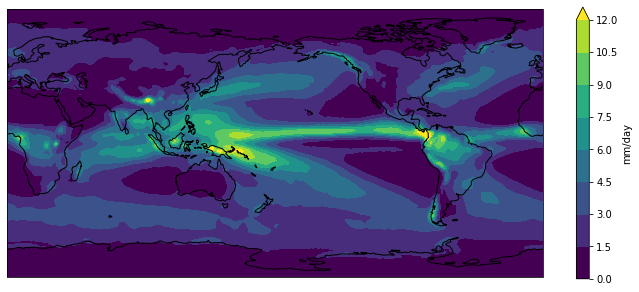

In [13]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units})
ax.coastlines()

plt.show()